In [193]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
edf = pd.read_csv('/content/takehome_user_engagement.csv',encoding = "ISO-8859-1")
udf = pd.read_csv('/content/takehome_users.csv',encoding = "ISO-8859-1")

In [195]:
udf.rename(columns = {'object_id':'user_id'}, inplace = True)

In [196]:
udf.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [197]:
edf.time_stamp = pd.to_datetime(edf.time_stamp)
edf

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [198]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

edf['visits_in_7days'] = edf.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [199]:
edf

,time_stamp,user_id,visited,visits_in_7days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0


In [200]:
edf1 = edf.groupby('user_id')[['visits_in_7days']].max()
edf1['visits_in_7days'] = edf1['visits_in_7days'].astype(int)
edf1

,visits_in_7days
user_id,
1,1
2,3
3,1
4,1
5,1
...,...
11996,1
11997,1
11998,1


Filtering the visits into 2 Catogories

In [201]:
edf1.loc[edf1['visits_in_7days'] >= 3,'adopted_user'] = 1
edf1.loc[edf1['visits_in_7days'] < 3,'adopted_user'] = 0
edf1

,visits_in_7days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
...,...,...
11996,1,0.0
11997,1,0.0
11998,1,0.0


In [202]:
edf1['adopted_user'].value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

First login dates

In [203]:
time = edf.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20
...,...,...
8818,11996,2013-09-06 06:14:15
8819,11997,2013-01-15 18:28:37
8820,11998,2014-04-27 12:45:16
8821,11999,2012-06-02 11:55:59


In [204]:
df = udf.merge(edf1, how = 'left',on = 'user_id',sort = True)
df = df.merge(time,how='left',on = 'user_id',sort = True)
df = df.rename({'time_stamp':'first_login'},axis = 'columns')
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_in_7days,adopted_user,first_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0,0.0,2013-09-06 06:14:15
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0,0.0,2013-01-15 18:28:37
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0,0.0,2014-04-27 12:45:16
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0,0.0,2012-06-02 11:55:59


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  visits_in_7days             8823 non-null   float64       
 11  adopted_user                8823 non-null   float64   

Adding a feature to find the Timegaps 

In [206]:
df.creation_time = pd.to_datetime(df.creation_time)
df['first_login_creation_gap'] = (df['first_login'] - df['creation_time']).dt.days
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_in_7days,adopted_user,first_login,first_login_creation_gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0,0.0,2013-09-06 06:14:15,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0,0.0,2013-01-15 18:28:37,5.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0,0.0,2014-04-27 12:45:16,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0,0.0,2012-06-02 11:55:59,2.0


In [207]:
user_login_gap = edf.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']
user_login_gap

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0
...,...
207912,NaN
207913,NaN
207914,NaN
207915,NaN


In [208]:
edf = edf.merge(user_login_gap, left_index = True, right_index = True)
gap_mean = edf.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN
...,...
11996,NaN
11997,NaN
11998,NaN


In [209]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_in_7days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0,0.0,2013-09-06 06:14:15,0.0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0,0.0,2013-01-15 18:28:37,5.0,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0,0.0,2014-04-27 12:45:16,0.0,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0,0.0,2012-06-02 11:55:59,2.0,NaN


ORG ID by size clusters

In [210]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df.org_id.apply(org_size)
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_in_7days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0,0.0,2013-09-06 06:14:15,0.0,NaN,small
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0,0.0,2013-01-15 18:28:37,5.0,NaN,medium
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0,0.0,2014-04-27 12:45:16,0.0,NaN,small
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0,0.0,2012-06-02 11:55:59,2.0,NaN,small


org_id by cluster org_id into different size

In [211]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df.org_id.apply(org_size)
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_in_7days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0,0.0,2013-09-06 06:14:15,0.0,NaN,small
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0,0.0,2013-01-15 18:28:37,5.0,NaN,medium
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0,0.0,2014-04-27 12:45:16,0.0,NaN,small
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0,0.0,2012-06-02 11:55:59,2.0,NaN,small


normalizing the session creation time

In [212]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)
df['last_session_creation_time']

0        139.813881
1        139.623750
2        136.373489
3        136.921017
4        135.884966
            ...    
11995    137.844806
11996    135.827452
11997    139.860272
11998    133.863816
11999    139.072663
Name: last_session_creation_time, Length: 12000, dtype: float64

In [213]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'
    
    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [214]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','visits_in_7days','first_login'], axis = 1)
df

,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large
...,...,...,...,...,...,...,...,...,...,...
11995,SophiaMeier@gustr.com,ORG_INVITE,137.844806,0,0,0.0,0.0,NaN,small,Large
11996,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,135.827452,0,0,0.0,5.0,NaN,medium,small
11997,JakeHaynes@cuvox.de,GUEST_INVITE,139.860272,1,1,0.0,0.0,NaN,small,Large
11998,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,133.863816,0,0,0.0,2.0,NaN,small,small


In [215]:
df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size'])
df.head()

,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
0,AugustCClausen@yahoo.com,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,0,0,0,1,1,0,0
1,MatthewPoole@gustr.com,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,0,0,0,1,1,0,0
2,MitchellBottrill@gustr.com,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,0,0,0,1,1,0,0
3,NicklasSClausen@yahoo.com,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,0,0,0,1,1,0,0
4,GraceRaw@yahoo.com,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,0,0,1,0,1,0,0


In [216]:
df.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
count,8823.000000,12000.000000,12000.000000,8823.000000,8823.000000,2588.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,137.927931,0.249500,0.149333,0.181571,1.001813,7.822104,0.180250,0.354500,0.175917,0.173917,0.115417,0.154500,0.363667,0.481833,0.534167,0.000500,0.465333
std,1.953116,0.432742,0.356432,0.385512,1.401329,7.039812,0.384412,0.478381,0.380765,0.379054,0.319537,0.361442,0.481074,0.499691,0.498852,0.022356,0.498818
min,133.845241,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.319497,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,138.288847,0.000000,0.000000,0.000000,1.000000,5.626453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,139.844260,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,140.206673,1.000000,1.000000,1.000000,14.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_creation_gap = df.first_login_creation_gap.fillna(1.001813)
df.mean_login_gap_length = df.mean_login_gap_length.fillna(7.822104)
df = df.drop('email', axis=1)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          12000 non-null  float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        12000 non-null  float64
 4   first_login_creation_gap            12000 non-null  float64
 5   mean_login_gap_length               12000 non-null  float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

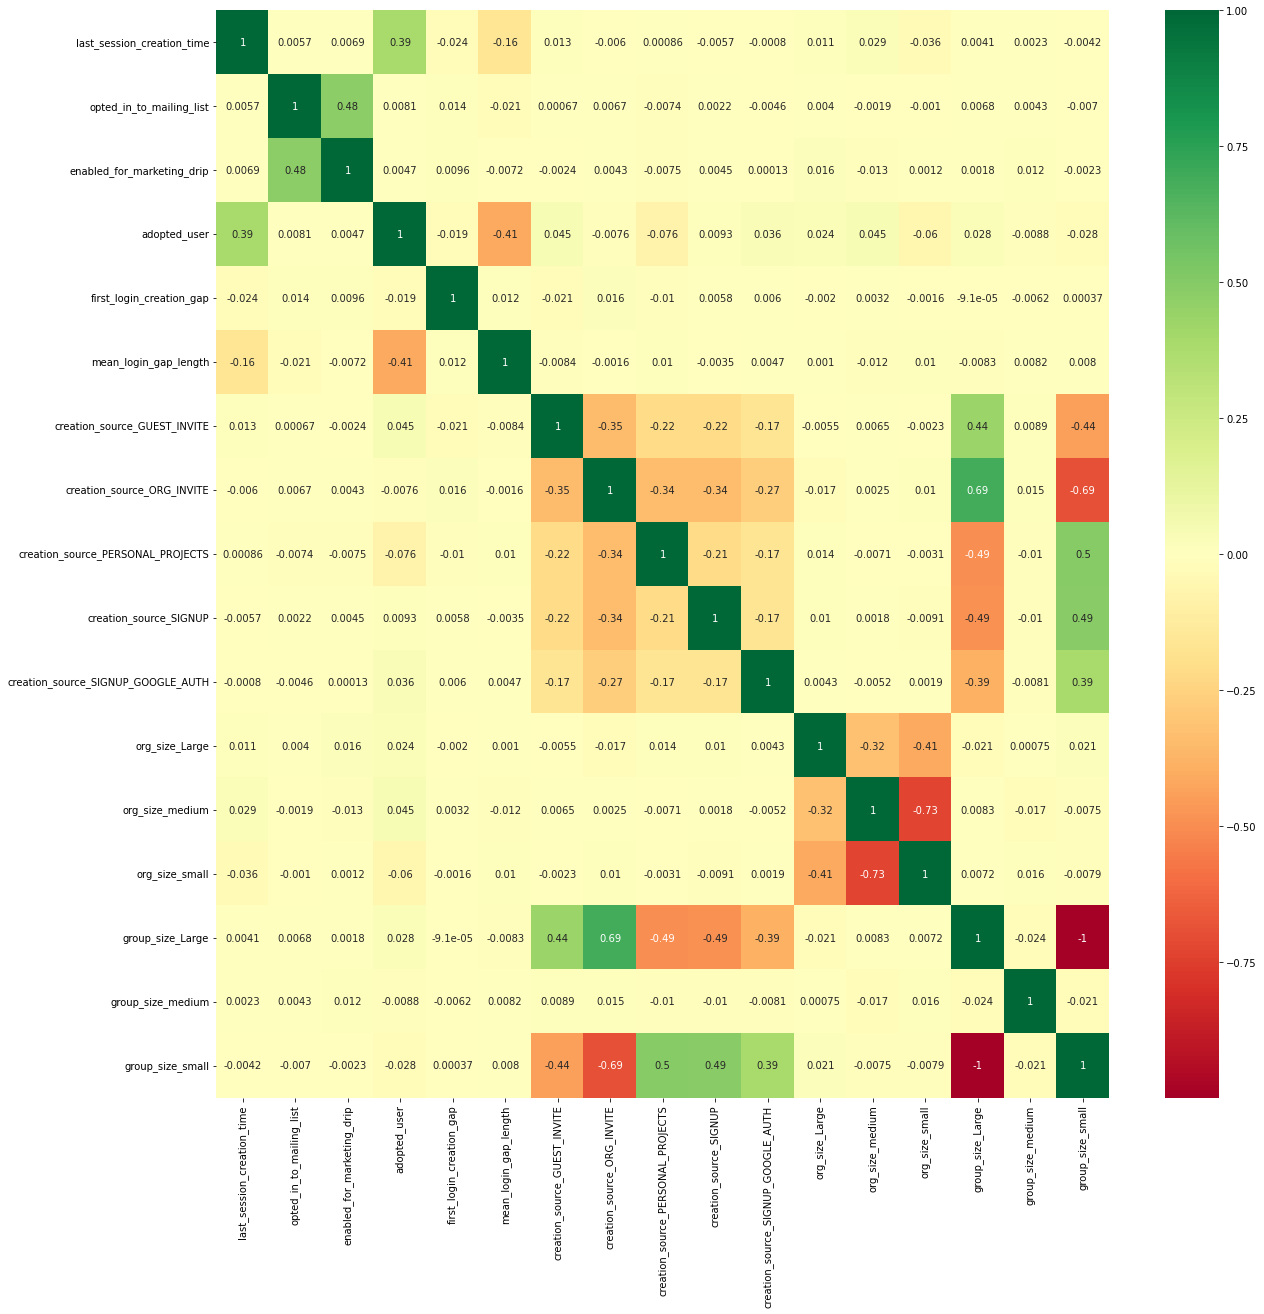

In [222]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")